In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf




In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("/Users/nxfer/.spyder-py3/Spaceship Titanic/train.csv")
df.shape

(8693, 14)

In [13]:
df = df.dropna()
df.shape


(6606, 14)

In [14]:
y = df["Transported"]
X = df[["HomePlanet","CryoSleep","Cabin","Destination","Age","VIP", "RoomService","FoodCourt","ShoppingMall", "Spa","VRDeck","PassengerId"]]

In [15]:
validation_size = 0.2

#train and test split randomly
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [16]:
label_encoder = LabelEncoder()
categorical_cols = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "PassengerId"]
X_train = pd.get_dummies(X_train, columns = categorical_cols)
X_validation = pd.get_dummies(X_validation, columns = categorical_cols)
final_train, final_validation = X_train.align(X_validation, join='inner', axis=1)
Y_overall = label_encoder.fit_transform(y)
Y_train = label_encoder.fit_transform(Y_train)
Y_validation = label_encoder.fit_transform(Y_validation)

In [17]:
final_train.shape

(5284, 349)

In [18]:
square_transformed_train = np.square(final_train)
sqrt_transformed_train = np.sqrt(final_train)
square_transformed_val = np.square(final_validation)
sqrt_transformed_val = np.sqrt(final_validation)

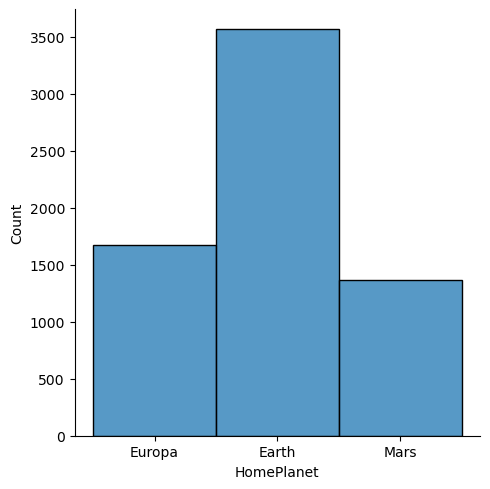

In [10]:
sns.displot(df, x="HomePlanet")

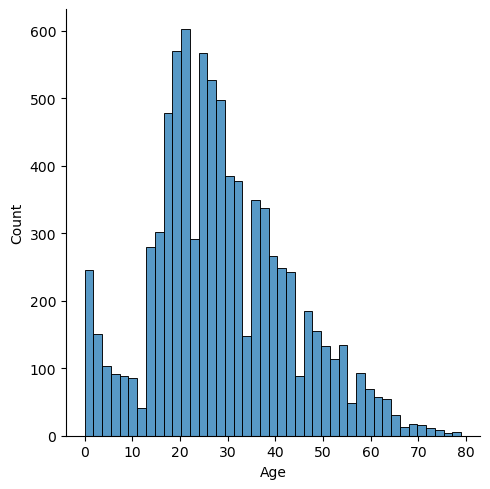

In [90]:
sns.displot(df, x="Age")

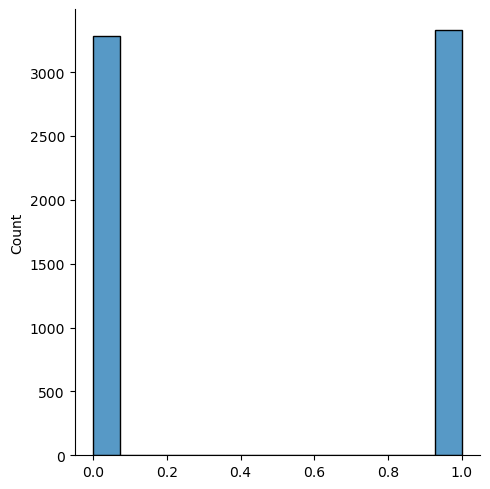

In [148]:
sns.displot(Y_overall)

In [174]:
final_train.shape

(5284, 349)

In [175]:
final_validation.shape

(1322, 349)

<AxesSubplot:title={'center':'Correlation Matrix'}>

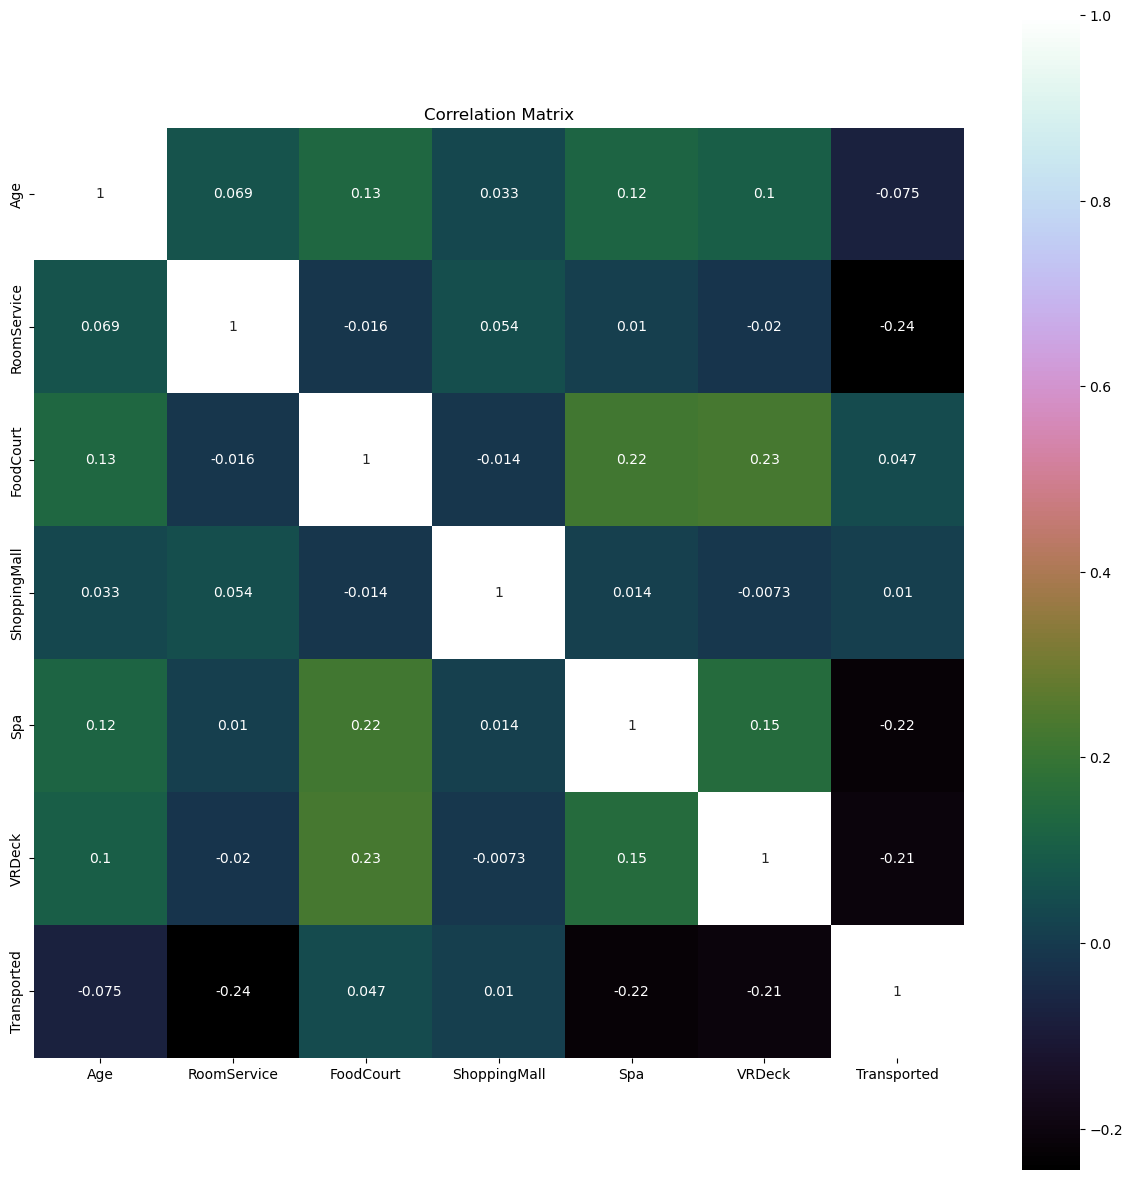

In [81]:
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [188]:
log_clf = LogisticRegression()
log_clf.fit(final_train, Y_train)

LogisticRegression()

In [189]:
training_predictions = log_clf.predict(final_train)
val_predictions = log_clf.predict(final_validation)

In [190]:
print('Training Prediction accuracy is {}'.format(accuracy_score(Y_train, training_predictions)))
print('Validation Prediction accuracy is {}'.format(accuracy_score(Y_validation, val_predictions)))

Training Prediction accuracy is 0.7929598788796366
Validation Prediction accuracy is 0.762481089258699


In [184]:
log_clf.fit(square_transformed_train, Y_train)
training_predictions = log_clf.predict(square_transformed_train)
val_predictions = log_clf.predict(square_transformed_val)
print('Training Prediction accuracy is {}'.format(accuracy_score(Y_train, training_predictions)))
print('Validation Prediction accuracy is {}'.format(accuracy_score(Y_validation, val_predictions)))

Training Prediction accuracy is 0.7585162755488266
Validation Prediction accuracy is 0.7549167927382754


In [185]:
log_clf.fit(sqrt_transformed_train, Y_train)
training_predictions = log_clf.predict(sqrt_transformed_train)
val_predictions = log_clf.predict(sqrt_transformed_val)
print('Training Prediction accuracy is {}'.format(accuracy_score(Y_train, training_predictions)))
print('Validation Prediction accuracy is {}'.format(accuracy_score(Y_validation, val_predictions)))

Training Prediction accuracy is 0.8010976532929599
Validation Prediction accuracy is 0.7813918305597579


In [39]:
model_predictions_train_x = []
model_predictions_val_x = []
c = [0.01, 0.1, 1, 10, 100, 1000]
regularization = ['none', 'l2']
for i in range(2):
    for j in range(6):
        log_clf = LogisticRegression(penalty = regularization[i], C = c[j])
        log_clf.fit(final_train, Y_train)
        training_predictions = log_clf.predict(final_train)
        val_predictions = log_clf.predict(final_validation)
        model_predictions_train_x.append(accuracy_score(Y_train, training_predictions))
        model_predictions_val_x.append(accuracy_score(Y_validation, val_predictions))

In [48]:
train_x_none = model_predictions_train_x[0:6]
train_x_l2 = model_predictions_train_x[6:12]

In [47]:
val_x_none = model_predictions_val_x[0:6]
val_x_l2 = model_predictions_val_x[6:12]

In [44]:
model_predictions_train_square = []
model_predictions_val_square = []
c = [0.01, 0.1, 1, 10, 100, 1000]
regularization = ['none', 'l2']
for i in range(2):
    for j in range(6):
        log_clf = LogisticRegression(penalty = regularization[i],C = c[j])
        log_clf.fit(square_transformed_train, Y_train)
        training_predictions = log_clf.predict(square_transformed_train)
        val_predictions = log_clf.predict(square_transformed_val)
        model_predictions_train_square.append(accuracy_score(Y_train, training_predictions))
        model_predictions_val_square.append(accuracy_score(Y_validation, val_predictions))

In [46]:
train_square_none = model_predictions_train_square[0:6]
train_square_l2 = model_predictions_train_square[6:12]

In [45]:
val_square_none = model_predictions_val_square[0:6]
val_square_l2 = model_predictions_val_square[6:12]

In [49]:
model_predictions_train_sqrt = []
model_predictions_val_sqrt = []
c = [0.01, 0.1, 1, 10, 100, 1000]
regularization = ['none', 'l2']
for i in range(2):
    for j in range(6):
        log_clf = LogisticRegression(penalty = regularization[i],C = c[j])
        log_clf.fit(sqrt_transformed_train, Y_train)
        training_predictions = log_clf.predict(sqrt_transformed_train)
        val_predictions = log_clf.predict(sqrt_transformed_val)
        model_predictions_train_sqrt.append(accuracy_score(Y_train, training_predictions))
        model_predictions_val_sqrt.append(accuracy_score(Y_validation, val_predictions))

In [50]:
train_sqrt_none = model_predictions_train_sqrt[0:6]
train_sqrt_l2 = model_predictions_train_sqrt[6:12]

In [51]:
val_sqrt_none = model_predictions_val_sqrt[0:6]
val_sqrt_l2 = model_predictions_val_sqrt[6:12]

In [52]:
model_predictions_train_l1 = []
model_predictions_val_l1 = []
c = [0.01, 0.1, 1, 10, 100, 1000]
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
for i in range(3):
    for j in range(6):
        log_clf = LogisticRegression(penalty = 'l1',C = c[j], solver='liblinear')
        log_clf.fit(data_train[i], Y_train)
        training_predictions = log_clf.predict(data_train[i])
        val_predictions = log_clf.predict(data_val[i])
        model_predictions_train_l1.append(accuracy_score(Y_train, training_predictions))
        model_predictions_val_l1.append(accuracy_score(Y_validation, val_predictions))

In [53]:
train_x_l1 = model_predictions_train_l1[0:6]
train_square_l1 = model_predictions_train_l1[6:12]
train_sqrt_l1 = model_predictions_train_l1[12:18]

In [54]:
val_x_l1 = model_predictions_val_l1[0:6]
val_square_l1 = model_predictions_val_l1[6:12]
val_sqrt_l1 = model_predictions_val_l1[12:18]

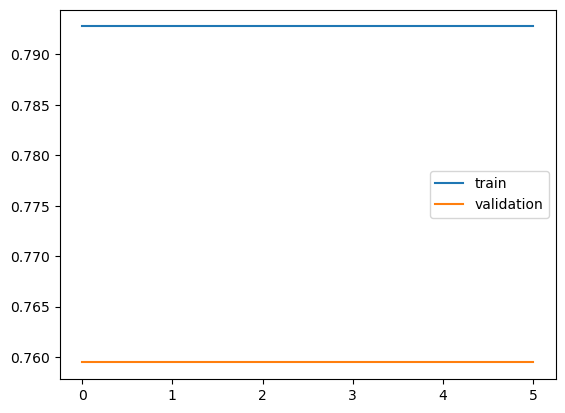

In [55]:
plt.plot(train_x_none, label = 'train')
plt.plot(val_x_none, label = 'validation')
plt.legend()
plt.show()

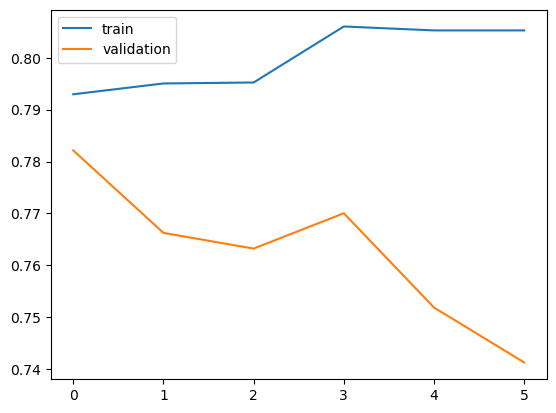

In [56]:
plt.plot(train_x_l1, label = 'train')
plt.plot(val_x_l1, label = 'validation')
plt.legend()
plt.show()

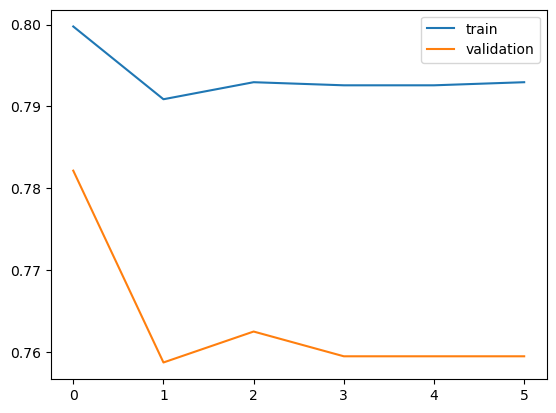

In [57]:
plt.plot(train_x_l2, label = 'train')
plt.plot(val_x_l2, label = 'validation')
plt.legend()
plt.show()

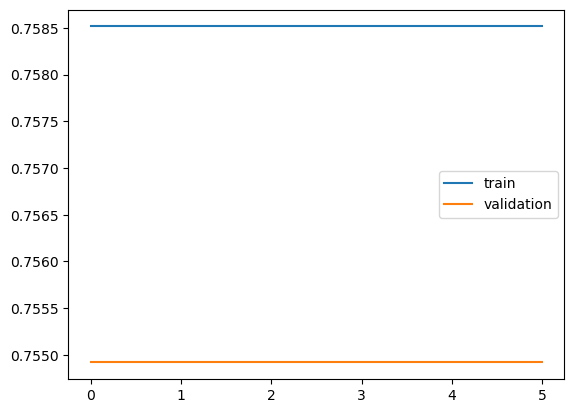

In [58]:
plt.plot(train_square_none, label = 'train')
plt.plot(val_square_none, label = 'validation')
plt.legend()
plt.show()

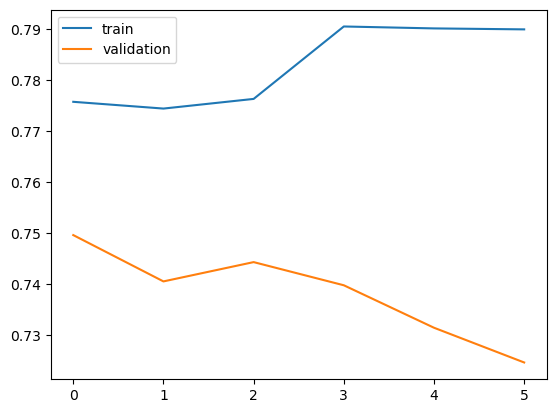

In [60]:
plt.plot(train_square_l1, label = 'train')
plt.plot(val_square_l1, label = 'validation')
plt.legend()
plt.show()

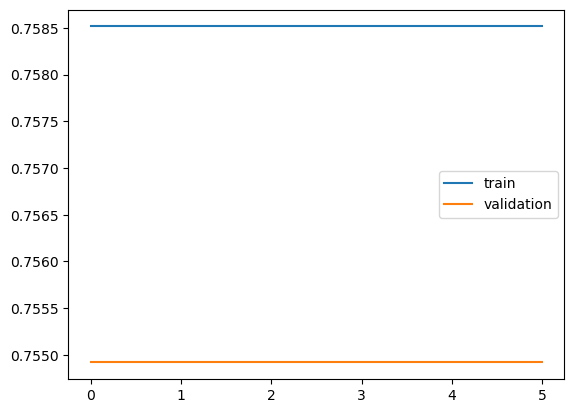

In [61]:
plt.plot(train_square_l2, label = 'train')
plt.plot(val_square_l2, label = 'validation')
plt.legend()
plt.show()

In [11]:
log_clf = LogisticRegression(penalty = "l2",C = 0.01)
log_clf.fit(sqrt_transformed_train, Y_train)
training_predictions = log_clf.predict(sqrt_transformed_train)
val_predictions = log_clf.predict(sqrt_transformed_val)
print('Training Prediction accuracy is {}'.format(accuracy_score(Y_train, training_predictions)))
print('Validation Prediction accuracy is {}'.format(accuracy_score(Y_validation, val_predictions)))

Training Prediction accuracy is 0.796555639666919
Validation Prediction accuracy is 0.7866868381240545


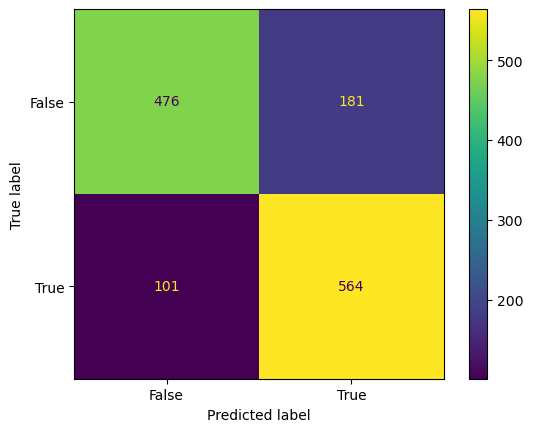

In [11]:
cf = confusion_matrix(Y_validation, val_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

In [22]:
X_scale = StandardScaler()
new_train = X_scale.fit_transform(final_train)
new_validation = X_scale.fit_transform(final_validation)
new_train.shape

(5284, 349)

In [23]:
model_predictions_train_orig = []
model_predictions_val_orig = []
c = [0.01, 0.1, 1, 10, 100, 1000]
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
kernels = ['linear', 'poly', 'rbf']
for i in range(3):
    print(kernels[i])
    for j in range(6):
        svc_clf = SVC(C = c[j], kernel= kernels[i])
        svc_clf.fit(new_train, Y_train)
        training_predictions = svc_clf.predict(new_train)
        val_predictions = svc_clf.predict(new_validation)
        print('Training Prediction accuracy for {} is {}'.format(c[j], accuracy_score(Y_train, training_predictions)))
        print('Validation Prediction accuracy for {} is {}'.format(c[j], accuracy_score(Y_validation, val_predictions)))
        model_predictions_train_orig.append(accuracy_score(Y_train, training_predictions))
        model_predictions_val_orig.append(accuracy_score(Y_validation, val_predictions))

linear
Training Prediction accuracy for 0.01 is 0.788228614685844
Validation Prediction accuracy for 0.01 is 0.7473524962178517
Training Prediction accuracy for 0.1 is 0.8018546555639667
Validation Prediction accuracy for 0.1 is 0.7639939485627837
Training Prediction accuracy for 1 is 0.8046934140802422
Validation Prediction accuracy for 1 is 0.7715582450832073
Training Prediction accuracy for 10 is 0.805450416351249
Validation Prediction accuracy for 10 is 0.7738275340393344
Training Prediction accuracy for 100 is 0.8052611657834974
Validation Prediction accuracy for 100 is 0.773071104387292
Training Prediction accuracy for 1000 is 0.8052611657834974
Validation Prediction accuracy for 1000 is 0.7760968229954615
poly
Training Prediction accuracy for 0.01 is 0.5440953822861468
Validation Prediction accuracy for 0.01 is 0.5068078668683812
Training Prediction accuracy for 0.1 is 0.5482588947766843
Validation Prediction accuracy for 0.1 is 0.5075642965204236
Training Prediction accuracy fo

In [28]:
linear_x_train = model_predictions_train_orig[0:6]
poly_x_train = model_predictions_train_orig[6:12]
rbf_x_train = model_predictions_train_orig[12:18]

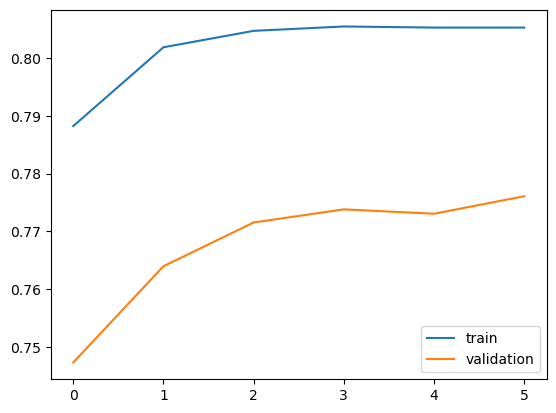

In [33]:
linear_x_val = model_predictions_val_orig[0:6]
poly_x_val = model_predictions_val_orig[6:12]
rbf_x_val = model_predictions_val_orig[12:18]
plt.plot(linear_x_train, label = 'train')
plt.plot(linear_x_val, label = 'validation')
plt.legend()
plt.show()

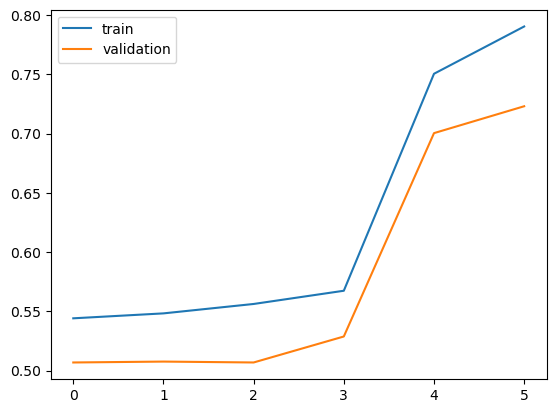

In [34]:
plt.plot(poly_x_train, label = 'train')
plt.plot(poly_x_val, label = 'validation')
plt.legend()
plt.show()

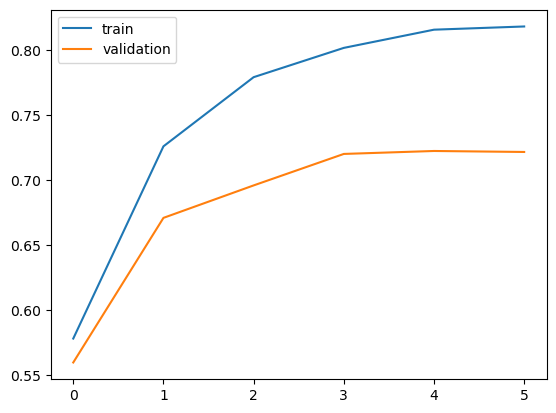

In [35]:
plt.plot(rbf_x_train, label = 'train')
plt.plot(rbf_x_val, label = 'validation')
plt.legend()
plt.show()

In [14]:
X_scale = StandardScaler()
new_train = X_scale.fit_transform(sqrt_transformed_train)
new_validation = X_scale.fit_transform(sqrt_transformed_val)
new_train.shape

(5284, 349)

In [15]:
model_predictions_train = []
model_predictions_val = []
c = [0.01, 0.1, 1, 10, 100, 1000]
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
kernels = ['linear', 'poly', 'rbf']
for i in range(3):
    print(kernels[i])
    for j in range(6):
        svc_clf = SVC(C = c[j], kernel= kernels[i])
        svc_clf.fit(new_train, Y_train)
        training_predictions = svc_clf.predict(new_train)
        val_predictions = svc_clf.predict(new_validation)
        print('Training Prediction accuracy for {} is {}'.format(c[j], accuracy_score(Y_train, training_predictions)))
        print('Validation Prediction accuracy for {} is {}'.format(c[j], accuracy_score(Y_validation, val_predictions)))
        model_predictions_train.append(accuracy_score(Y_train, training_predictions))
        model_predictions_val.append(accuracy_score(Y_validation, val_predictions))

linear
Training Prediction accuracy for 0.01 is 0.8109386828160484
Validation Prediction accuracy for 0.01 is 0.7995461422087746
Training Prediction accuracy for 0.1 is 0.8116956850870553
Validation Prediction accuracy for 0.1 is 0.7972768532526475
Training Prediction accuracy for 1 is 0.8115064345193036
Validation Prediction accuracy for 1 is 0.7957639939485628
Training Prediction accuracy for 10 is 0.8115064345193036
Validation Prediction accuracy for 10 is 0.7957639939485628
Training Prediction accuracy for 100 is 0.8113171839515518
Validation Prediction accuracy for 100 is 0.7957639939485628
Training Prediction accuracy for 1000 is 0.8120741862225587
Validation Prediction accuracy for 1000 is 0.7957639939485628
poly
Training Prediction accuracy for 0.01 is 0.5440953822861468
Validation Prediction accuracy for 0.01 is 0.5060514372163388
Training Prediction accuracy for 0.1 is 0.5486373959121877
Validation Prediction accuracy for 0.1 is 0.5068078668683812
Training Prediction accuracy

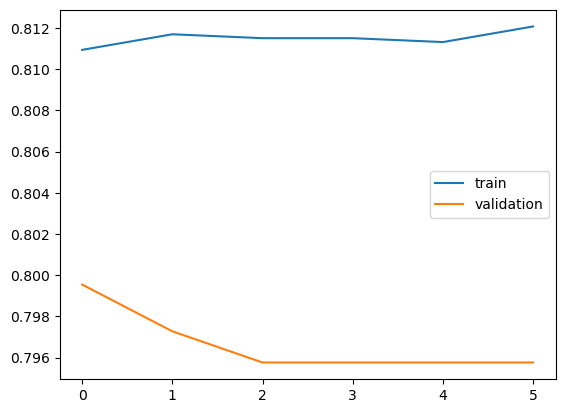

In [36]:
linear_sqrt_train = model_predictions_train[0:6]
poly_sqrt_train = model_predictions_train[6:12]
rbf_sqrt_train = model_predictions_train[12:18]
linear_sqrt_val = model_predictions_val[0:6]
poly_sqrt_val = model_predictions_val[6:12]
rbf_sqrt_val = model_predictions_val[12:18]
plt.plot(linear_sqrt_train, label = 'train')
plt.plot(linear_sqrt_val, label = 'validation')
plt.legend()
plt.show()

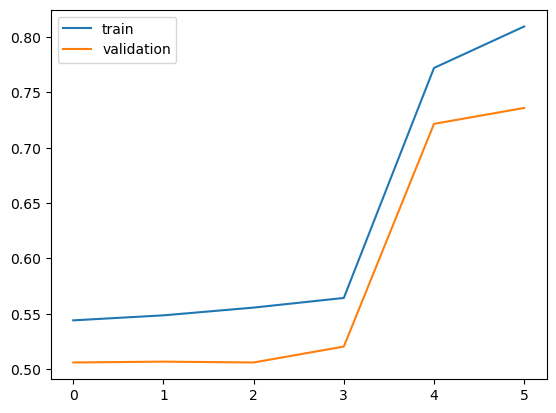

In [37]:
plt.plot(poly_sqrt_train, label = 'train')
plt.plot(poly_sqrt_val, label = 'validation')
plt.legend()
plt.show()

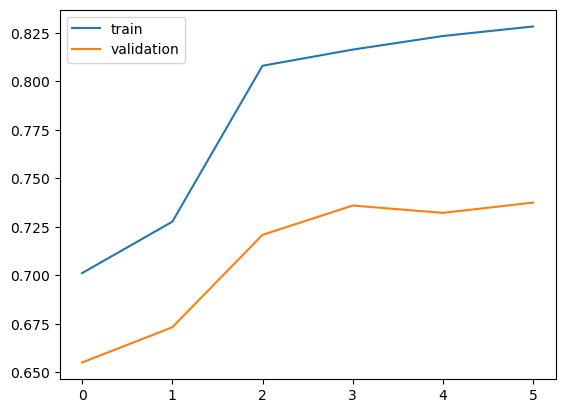

In [38]:
plt.plot(rbf_sqrt_train, label = 'train')
plt.plot(rbf_sqrt_val, label = 'validation')
plt.legend()
plt.show()

In [19]:
svc_clf = SVC(C = 0.01, kernel= 'linear')
svc_clf.fit(new_train, Y_train)
training_predictions = svc_clf.predict(new_train)
val_predictions = svc_clf.predict(new_validation)
print('Training Prediction accuracy for {} is {}'.format('0.01', accuracy_score(Y_train, training_predictions)))
print('Validation Prediction accuracy for {} is {}'.format('0.01', accuracy_score(Y_validation, val_predictions)))

Training Prediction accuracy for 0.01 is 0.8109386828160484
Validation Prediction accuracy for 0.01 is 0.7995461422087746


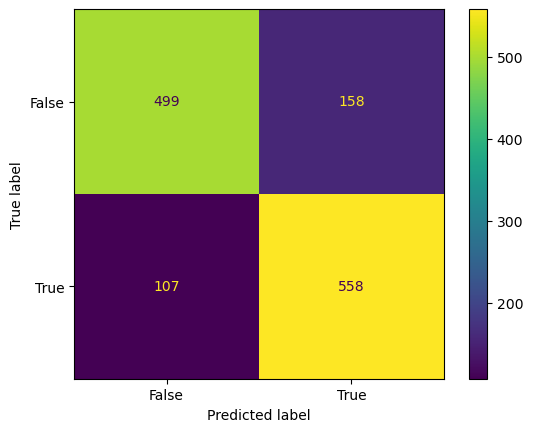

In [18]:
cf = confusion_matrix(Y_validation, val_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

In [19]:
# Try 3 models: [349,64,1] [349,64,32,1] [349,64,32,16,1]
# Try 3 scales: Normal, Square, Sqrt
# Try L1, L2, and no regularization at c = [0.01, 0.1, 1, 10, 100, 1000]

In [129]:
# Model [349,64,1] no regularization
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
model_accuracy_train = []
model_accuracy_val = []
for i in range(len(data_train)):
    input_shape = [data_train[i].shape[1]]
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, activation='sigmoid', input_shape=input_shape),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.MeanSquaredError())
    losses = model.fit(data_train[i].to_numpy().astype(int), Y_train,
                       validation_data=(data_val[i].to_numpy().astype(int), Y_validation),
                       batch_size=64,
                       epochs=32, verbose=0)
    argmax_train_accuracy = np.argmax(losses.history['accuracy'])
    max_train_accuracy = losses.history['accuracy'][argmax_train_accuracy]
    argmax_val_accuracy = np.argmax(losses.history['val_accuracy'])
    max_val_accuracy = losses.history['val_accuracy'][argmax_val_accuracy]
    model_accuracy_train.append([argmax_train_accuracy,max_train_accuracy])
    model_accuracy_val.append([argmax_val_accuracy,max_val_accuracy])
    print(f"[{i}] Best Training Accuracy at Epoch {argmax_train_accuracy}: {max_train_accuracy}")
    print(f"[{i}] Best Validation Accuracy at Epoch {argmax_val_accuracy}: {max_val_accuracy}")

[0] Best Training Accuracy at Epoch 27: 0.8075321912765503
[0] Best Validation Accuracy at Epoch 6: 0.7942511439323425
[1] Best Training Accuracy at Epoch 28: 0.7992051243782043
[1] Best Validation Accuracy at Epoch 19: 0.7866868376731873
[2] Best Training Accuracy at Epoch 29: 0.8118849396705627
[2] Best Validation Accuracy at Epoch 26: 0.795007586479187


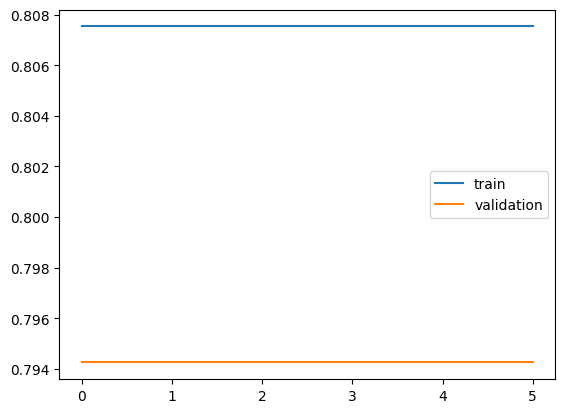

In [130]:
c = [0,1,2,3,4,5]
noreg_x_train = [model_accuracy_train[0][1] for i in range(len(c))]
noreg_x_val = [model_accuracy_val[0][1] for i in range(len(c))]
plt.plot(c, noreg_x_train, label = 'train')
plt.plot(c, noreg_x_val, label = 'validation')
plt.legend()
plt.show()

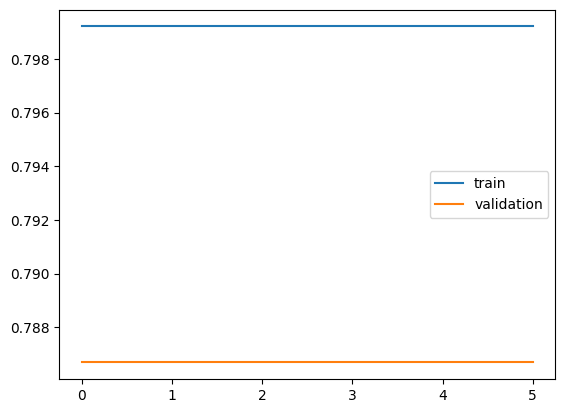

In [131]:
noreg_sq_train = [model_accuracy_train[1][1] for i in range(len(c))]
noreg_sq_val = [model_accuracy_val[1][1] for i in range(len(c))]
plt.plot(c, noreg_sq_train, label = 'train')
plt.plot(c, noreg_sq_val, label = 'validation')
plt.legend()
plt.show()

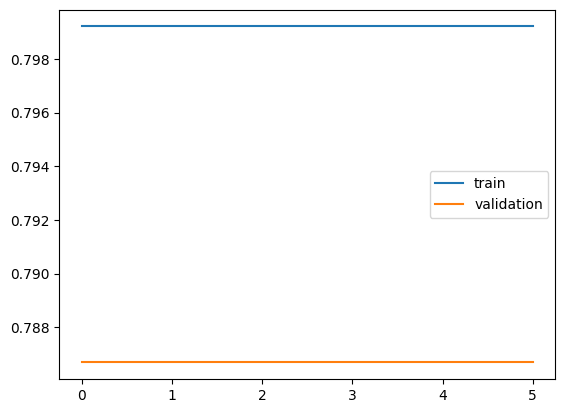

In [132]:
noreg_sqrt_train = [model_accuracy_train[1][1] for i in range(len(c))]
noreg_sqrt_val = [model_accuracy_val[1][1] for i in range(len(c))]
plt.plot(c, noreg_sqrt_train, label = 'train')
plt.plot(c, noreg_sqrt_val, label = 'validation')
plt.legend()
plt.show()

In [179]:
# Model [349,64,1] l1 regularization
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
all_model_accuracy_train = []
all_model_accuracy_val = []
c = [0.01, 0.1, 1, 10, 100, 1000]
for i in range(len(data_train)):
    model_accuracy_train = []
    model_accuracy_val = []
    for j in range(len(c)):
        print(f"Regularization Parameter: {c[j]}")
        input_shape = [data_train[i].shape[1]]
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=64, activation='sigmoid', input_shape=input_shape, kernel_regularizer=keras.regularizers.l1(c[j])),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.MeanSquaredError())
        losses = model.fit(data_train[i].to_numpy().astype(int), Y_train,
                           validation_data=(data_val[i].to_numpy().astype(int), Y_validation),
                           batch_size=64,
                           epochs=32, verbose=0)
        argmax_train_accuracy = np.argmax(losses.history['accuracy'])
        max_train_accuracy = losses.history['accuracy'][argmax_train_accuracy]
        argmax_val_accuracy = np.argmax(losses.history['val_accuracy'])
        max_val_accuracy = losses.history['val_accuracy'][argmax_val_accuracy]
        model_accuracy_train.append([argmax_train_accuracy,max_train_accuracy])
        model_accuracy_val.append([argmax_val_accuracy,max_val_accuracy])
        print(f"[{i}] Best Training Accuracy at Epoch {argmax_train_accuracy}: {max_train_accuracy}")
        print(f"[{i}] Best Validation Accuracy at Epoch {argmax_val_accuracy}: {max_val_accuracy}")
    all_model_accuracy_train.append(model_accuracy_train)
    all_model_accuracy_val.append(model_accuracy_val)

Regularization Parameter: 0.01
[0] Best Training Accuracy at Epoch 20: 0.7969341278076172
[0] Best Validation Accuracy at Epoch 12: 0.7927382588386536
Regularization Parameter: 0.1
[0] Best Training Accuracy at Epoch 13: 0.7927706241607666
[0] Best Validation Accuracy at Epoch 18: 0.793494701385498
Regularization Parameter: 1
[0] Best Training Accuracy at Epoch 27: 0.7715745568275452
[0] Best Validation Accuracy at Epoch 31: 0.7851739525794983
Regularization Parameter: 10
[0] Best Training Accuracy at Epoch 29: 0.7021195888519287
[0] Best Validation Accuracy at Epoch 1: 0.745083212852478
Regularization Parameter: 100
[0] Best Training Accuracy at Epoch 0: 0.6076835989952087
[0] Best Validation Accuracy at Epoch 29: 0.6512859463691711
Regularization Parameter: 1000
[0] Best Training Accuracy at Epoch 0: 0.6044663190841675
[0] Best Validation Accuracy at Epoch 0: 0.7428139448165894
Regularization Parameter: 0.01
[1] Best Training Accuracy at Epoch 13: 0.7806586027145386
[1] Best Validati

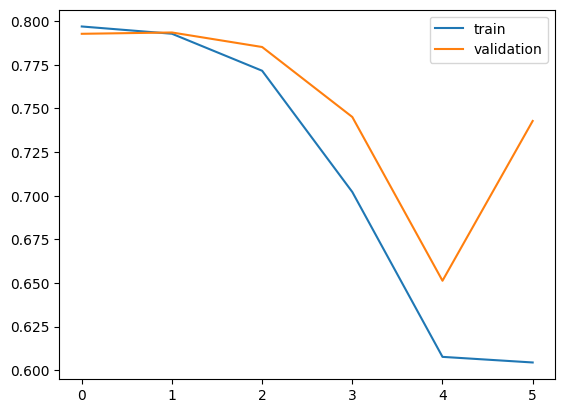

In [180]:
l1reg_x_train = [all_model_accuracy_train[0][i][1] for i in range(len(c))]
l1reg_x_val = [all_model_accuracy_val[0][i][1] for i in range(len(c))]
plt.plot(l1reg_x_train, label = 'train')
plt.plot(l1reg_x_val, label = 'validation')
plt.legend()
plt.show()

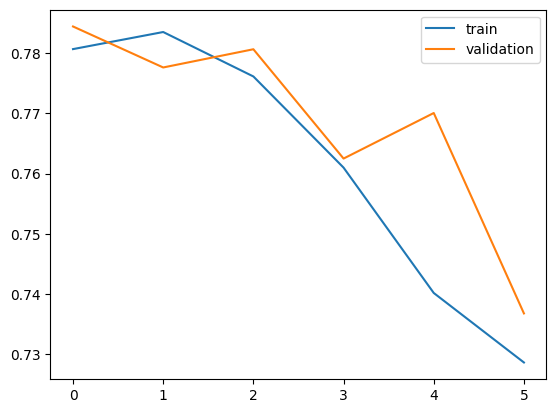

In [181]:
l1reg_sq_train = [all_model_accuracy_train[1][i][1] for i in range(len(c))]
l1reg_sq_val = [all_model_accuracy_val[1][i][1] for i in range(len(c))]
plt.plot(l1reg_sq_train, label = 'train')
plt.plot(l1reg_sq_val, label = 'validation')
plt.legend()
plt.show()

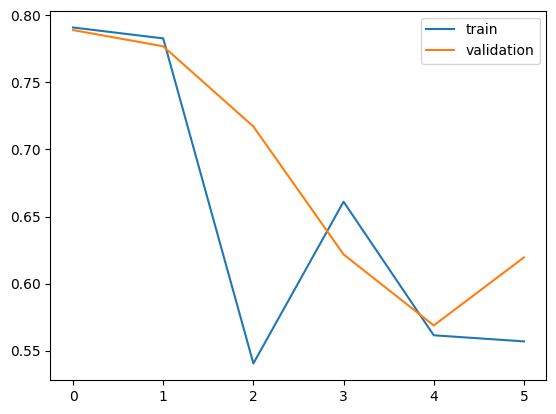

In [182]:
l1reg_sqrt_train = [all_model_accuracy_train[2][i][1] for i in range(len(c))]
l1reg_sqrt_val = [all_model_accuracy_val[2][i][1] for i in range(len(c))]
plt.plot(l1reg_sqrt_train, label = 'train')
plt.plot(l1reg_sqrt_val, label = 'validation')
plt.legend()
plt.show()

In [183]:
# Model [349,64,1] l2 regularization
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
all_model_accuracy_train = []
all_model_accuracy_val = []
c = [0.01, 0.1, 1, 10, 100, 1000]
for i in range(len(data_train)):
    model_accuracy_train = []
    model_accuracy_val = []
    for j in range(len(c)):
        print(f"Regularization Parameter: {c[j]}")
        input_shape = [data_train[i].shape[1]]
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=64, activation='sigmoid', input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(c[j])),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.MeanSquaredError())
        losses = model.fit(data_train[i].to_numpy().astype(int), Y_train,
                           validation_data=(data_val[i].to_numpy().astype(int), Y_validation),
                           batch_size=64,
                           epochs=32, verbose=0)
        argmax_train_accuracy = np.argmax(losses.history['accuracy'])
        max_train_accuracy = losses.history['accuracy'][argmax_train_accuracy]
        argmax_val_accuracy = np.argmax(losses.history['val_accuracy'])
        max_val_accuracy = losses.history['val_accuracy'][argmax_val_accuracy]
        model_accuracy_train.append([argmax_train_accuracy,max_train_accuracy])
        model_accuracy_val.append([argmax_val_accuracy,max_val_accuracy])
        print(f"[{i}] Best Training Accuracy at Epoch {argmax_train_accuracy}: {max_train_accuracy}")
        print(f"[{i}] Best Validation Accuracy at Epoch {argmax_val_accuracy}: {max_val_accuracy}")
    all_model_accuracy_train.append(model_accuracy_train)
    all_model_accuracy_val.append(model_accuracy_val)

Regularization Parameter: 0.01
[0] Best Training Accuracy at Epoch 30: 0.7995836734771729
[0] Best Validation Accuracy at Epoch 5: 0.7972768545150757
Regularization Parameter: 0.1
[0] Best Training Accuracy at Epoch 1: 0.7978804111480713
[0] Best Validation Accuracy at Epoch 14: 0.7942511439323425
Regularization Parameter: 1
[0] Best Training Accuracy at Epoch 21: 0.7984481453895569
[0] Best Validation Accuracy at Epoch 19: 0.7965204119682312
Regularization Parameter: 10
[0] Best Training Accuracy at Epoch 2: 0.7948523759841919
[0] Best Validation Accuracy at Epoch 10: 0.7912254333496094
Regularization Parameter: 100
[0] Best Training Accuracy at Epoch 12: 0.782551109790802
[0] Best Validation Accuracy at Epoch 8: 0.7851739525794983
Regularization Parameter: 1000
[0] Best Training Accuracy at Epoch 2: 0.772899329662323
[0] Best Validation Accuracy at Epoch 31: 0.7866868376731873
Regularization Parameter: 0.01
[1] Best Training Accuracy at Epoch 20: 0.7920136451721191
[1] Best Validatio

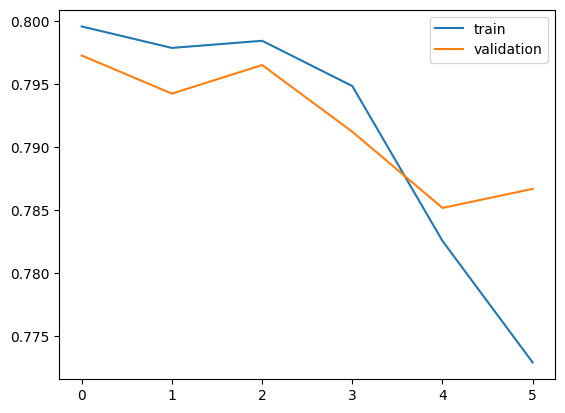

In [184]:
l2reg_x_train = [all_model_accuracy_train[0][i][1] for i in range(len(c))]
l2reg_x_val = [all_model_accuracy_val[0][i][1] for i in range(len(c))]
plt.plot(l2reg_x_train, label = 'train')
plt.plot(l2reg_x_val, label = 'validation')
plt.legend()
plt.show()

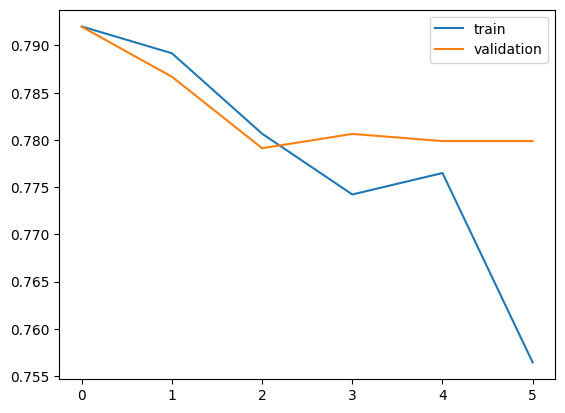

In [185]:
l2reg_sq_train = [all_model_accuracy_train[1][i][1] for i in range(len(c))]
l2reg_sq_val = [all_model_accuracy_val[1][i][1] for i in range(len(c))]
plt.plot(l2reg_sq_train, label = 'train')
plt.plot(l2reg_sq_val, label = 'validation')
plt.legend()
plt.show()

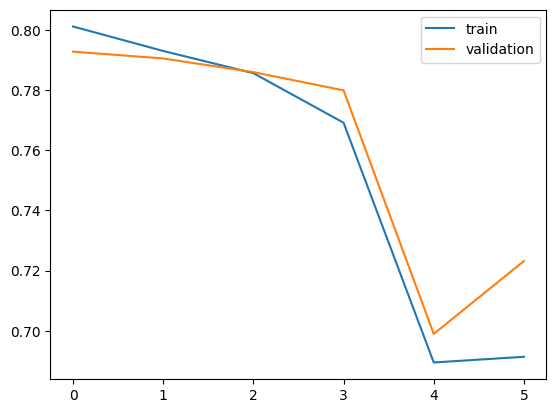

In [186]:
l2reg_sqrt_train = [all_model_accuracy_train[2][i][1] for i in range(len(c))]
l2reg_sqrt_val = [all_model_accuracy_val[2][i][1] for i in range(len(c))]
plt.plot(l2reg_sqrt_train, label = 'train')
plt.plot(l2reg_sqrt_val, label = 'validation')
plt.legend()
plt.show()

In [187]:
# Model [349,64,32,1] no regularization
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
for i in range(len(data_train)):
    input_shape = [data_train[i].shape[1]]
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, activation='sigmoid'),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.MeanSquaredError())
    losses = model.fit(data_train[i].to_numpy().astype(int), Y_train,
                       validation_data=(data_val[i].to_numpy().astype(int), Y_validation),
                       batch_size=64,
                       epochs=32, verbose=0)
    argmax_train_accuracy = np.argmax(losses.history['accuracy'])
    max_train_accuracy = losses.history['accuracy'][argmax_train_accuracy]
    argmax_val_accuracy = np.argmax(losses.history['val_accuracy'])
    max_val_accuracy = losses.history['val_accuracy'][argmax_val_accuracy]
    print(f"[{i}] Best Training Accuracy at Epoch {argmax_train_accuracy}: {max_train_accuracy}")
    print(f"[{i}] Best Validation Accuracy at Epoch {argmax_val_accuracy}: {max_val_accuracy}")

[0] Best Training Accuracy at Epoch 30: 0.8111279606819153
[0] Best Validation Accuracy at Epoch 24: 0.7965204119682312
[1] Best Training Accuracy at Epoch 28: 0.8048826456069946
[1] Best Validation Accuracy at Epoch 10: 0.7942511439323425
[2] Best Training Accuracy at Epoch 23: 0.8145344257354736
[2] Best Validation Accuracy at Epoch 9: 0.7919818162918091


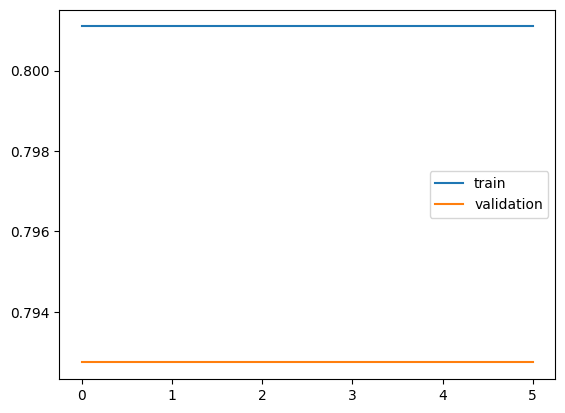

In [188]:
c = [0,1,2,3,4,5]
noreg_x_train = [model_accuracy_train[0][1] for i in range(len(c))]
noreg_x_val = [model_accuracy_val[0][1] for i in range(len(c))]
plt.plot(c, noreg_x_train, label = 'train')
plt.plot(c, noreg_x_val, label = 'validation')
plt.legend()
plt.show()

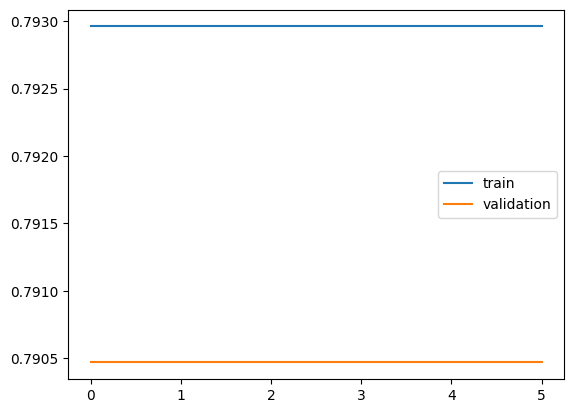

In [189]:
noreg_sq_train = [model_accuracy_train[1][1] for i in range(len(c))]
noreg_sq_val = [model_accuracy_val[1][1] for i in range(len(c))]
plt.plot(c, noreg_sq_train, label = 'train')
plt.plot(c, noreg_sq_val, label = 'validation')
plt.legend()
plt.show()

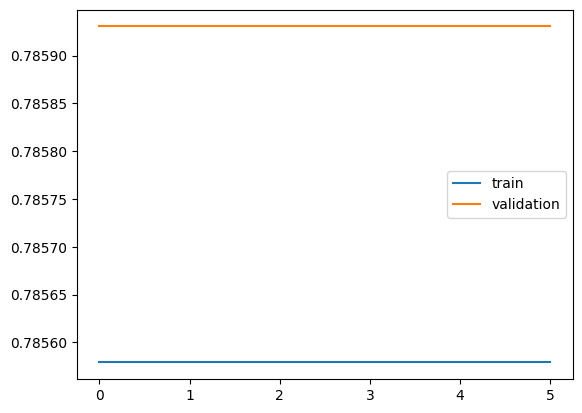

In [190]:
noreg_sqrt_train = [model_accuracy_train[2][1] for i in range(len(c))]
noreg_sqrt_val = [model_accuracy_val[2][1] for i in range(len(c))]
plt.plot(c, noreg_sqrt_train, label = 'train')
plt.plot(c, noreg_sqrt_val, label = 'validation')
plt.legend()
plt.show()

In [191]:
# Model [349,64,32,1] l1 regularization
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
all_model_accuracy_train = []
all_model_accuracy_val = []
c = [0.01, 0.1, 1, 10, 100, 1000]
for i in range(len(data_train)):
    model_accuracy_train = []
    model_accuracy_val = []
    for j in range(len(c)):
        print(f"Regularization Parameter: {c[j]}")
        input_shape = [data_train[i].shape[1]]
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=64, activation='sigmoid', input_shape=input_shape, kernel_regularizer=keras.regularizers.l1(c[j])),
            tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=keras.regularizers.l1(c[j])),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.MeanSquaredError())
        losses = model.fit(data_train[i].to_numpy().astype(int), Y_train,
                           validation_data=(data_val[i].to_numpy().astype(int), Y_validation),
                           batch_size=64,
                           epochs=32, verbose=0)
        argmax_train_accuracy = np.argmax(losses.history['accuracy'])
        max_train_accuracy = losses.history['accuracy'][argmax_train_accuracy]
        argmax_val_accuracy = np.argmax(losses.history['val_accuracy'])
        max_val_accuracy = losses.history['val_accuracy'][argmax_val_accuracy]
        model_accuracy_train.append([argmax_train_accuracy,max_train_accuracy])
        model_accuracy_val.append([argmax_val_accuracy,max_val_accuracy])
        print(f"[{i}] Best Training Accuracy at Epoch {argmax_train_accuracy}: {max_train_accuracy}")
        print(f"[{i}] Best Validation Accuracy at Epoch {argmax_val_accuracy}: {max_val_accuracy}")
    all_model_accuracy_train.append(model_accuracy_train)
    all_model_accuracy_val.append(model_accuracy_val)

Regularization Parameter: 0.01
[0] Best Training Accuracy at Epoch 20: 0.7961771488189697
[0] Best Validation Accuracy at Epoch 8: 0.795007586479187
Regularization Parameter: 0.1
[0] Best Training Accuracy at Epoch 1: 0.7587054967880249
[0] Best Validation Accuracy at Epoch 1: 0.7881997227668762
Regularization Parameter: 1
[0] Best Training Accuracy at Epoch 1: 0.6966313123703003
[0] Best Validation Accuracy at Epoch 0: 0.7564296722412109
Regularization Parameter: 10
[0] Best Training Accuracy at Epoch 1: 0.5599924325942993
[0] Best Validation Accuracy at Epoch 0: 0.5885022878646851
Regularization Parameter: 100
[0] Best Training Accuracy at Epoch 0: 0.635124921798706
[0] Best Validation Accuracy at Epoch 0: 0.6376702189445496
Regularization Parameter: 1000
[0] Best Training Accuracy at Epoch 1: 0.5259273052215576
[0] Best Validation Accuracy at Epoch 0: 0.6618759632110596
Regularization Parameter: 0.01
[1] Best Training Accuracy at Epoch 4: 0.7848221063613892
[1] Best Validation Accur

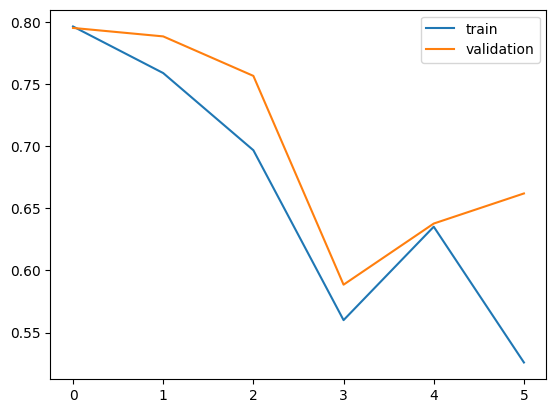

In [192]:
l1reg_x_train = [all_model_accuracy_train[0][i][1] for i in range(len(c))]
l1reg_x_val = [all_model_accuracy_val[0][i][1] for i in range(len(c))]
plt.plot(l1reg_x_train, label = 'train')
plt.plot(l1reg_x_val, label = 'validation')
plt.legend()
plt.show()

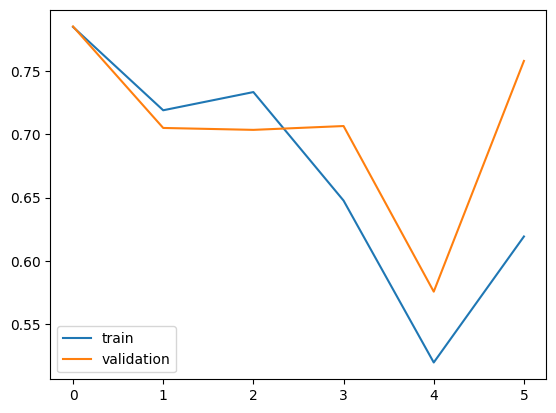

In [193]:
l1reg_sq_train = [all_model_accuracy_train[1][i][1] for i in range(len(c))]
l1reg_sq_val = [all_model_accuracy_val[1][i][1] for i in range(len(c))]
plt.plot(l1reg_sq_train, label = 'train')
plt.plot(l1reg_sq_val, label = 'validation')
plt.legend()
plt.show()

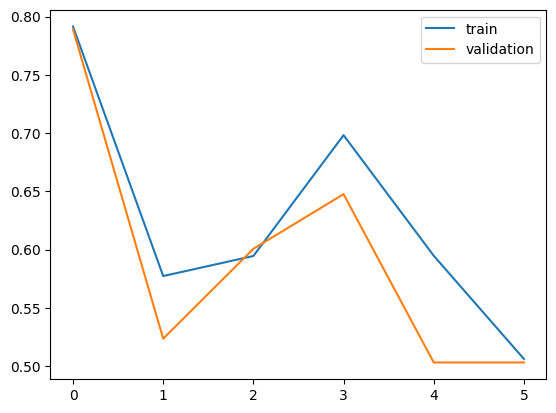

In [194]:
l1reg_sqrt_train = [all_model_accuracy_train[2][i][1] for i in range(len(c))]
l1reg_sqrt_val = [all_model_accuracy_val[2][i][1] for i in range(len(c))]
plt.plot(l1reg_sqrt_train, label = 'train')
plt.plot(l1reg_sqrt_val, label = 'validation')
plt.legend()
plt.show()

In [195]:
# Model [349,64,32,1] l2 regularization
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
all_model_accuracy_train = []
all_model_accuracy_val = []
c = [0.01, 0.1, 1, 10, 100, 1000]
for i in range(len(data_train)):
    model_accuracy_train = []
    model_accuracy_val = []
    for j in range(len(c)):
        print(f"Regularization Parameter: {c[j]}")
        input_shape = [data_train[i].shape[1]]
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=64, activation='sigmoid', input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(c[j])),
            tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=keras.regularizers.l2(c[j])),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.MeanSquaredError())
        losses = model.fit(data_train[i].to_numpy().astype(int), Y_train,
                           validation_data=(data_val[i].to_numpy().astype(int), Y_validation),
                           batch_size=64,
                           epochs=32, verbose=0)
        argmax_train_accuracy = np.argmax(losses.history['accuracy'])
        max_train_accuracy = losses.history['accuracy'][argmax_train_accuracy]
        argmax_val_accuracy = np.argmax(losses.history['val_accuracy'])
        max_val_accuracy = losses.history['val_accuracy'][argmax_val_accuracy]
        model_accuracy_train.append([argmax_train_accuracy,max_train_accuracy])
        model_accuracy_val.append([argmax_val_accuracy,max_val_accuracy])
        print(f"[{i}] Best Training Accuracy at Epoch {argmax_train_accuracy}: {max_train_accuracy}")
        print(f"[{i}] Best Validation Accuracy at Epoch {argmax_val_accuracy}: {max_val_accuracy}")
    all_model_accuracy_train.append(model_accuracy_train)
    all_model_accuracy_val.append(model_accuracy_val)

Regularization Parameter: 0.01
[0] Best Training Accuracy at Epoch 22: 0.7995836734771729
[0] Best Validation Accuracy at Epoch 29: 0.7957639694213867
Regularization Parameter: 0.1
[0] Best Training Accuracy at Epoch 9: 0.7978804111480713
[0] Best Validation Accuracy at Epoch 7: 0.795007586479187
Regularization Parameter: 1
[0] Best Training Accuracy at Epoch 1: 0.7952308654785156
[0] Best Validation Accuracy at Epoch 16: 0.793494701385498
Regularization Parameter: 10
[0] Best Training Accuracy at Epoch 2: 0.7889856100082397
[0] Best Validation Accuracy at Epoch 1: 0.7927382588386536
Regularization Parameter: 100
[0] Best Training Accuracy at Epoch 2: 0.7740347981452942
[0] Best Validation Accuracy at Epoch 3: 0.7776097059249878
Regularization Parameter: 1000
[0] Best Training Accuracy at Epoch 1: 0.678841769695282
[0] Best Validation Accuracy at Epoch 1: 0.6974281668663025
Regularization Parameter: 0.01
[1] Best Training Accuracy at Epoch 15: 0.7889856100082397
[1] Best Validation Acc

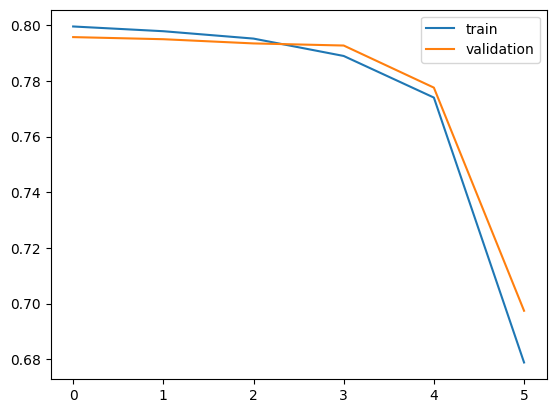

In [196]:
l2reg_x_train = [all_model_accuracy_train[0][i][1] for i in range(len(c))]
l2reg_x_val = [all_model_accuracy_val[0][i][1] for i in range(len(c))]
plt.plot(l2reg_x_train, label = 'train')
plt.plot(l2reg_x_val, label = 'validation')
plt.legend()
plt.show()

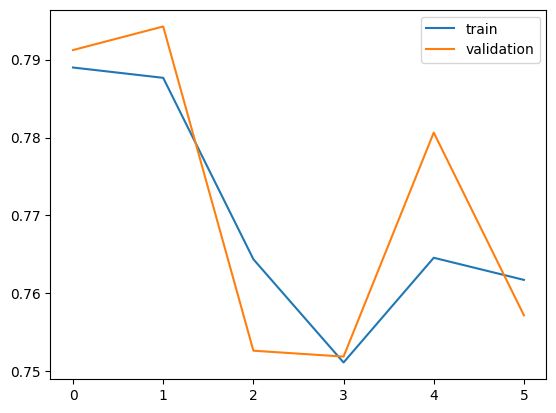

In [197]:
l2reg_sq_train = [all_model_accuracy_train[1][i][1] for i in range(len(c))]
l2reg_sq_val = [all_model_accuracy_val[1][i][1] for i in range(len(c))]
plt.plot(l2reg_sq_train, label = 'train')
plt.plot(l2reg_sq_val, label = 'validation')
plt.legend()
plt.show()

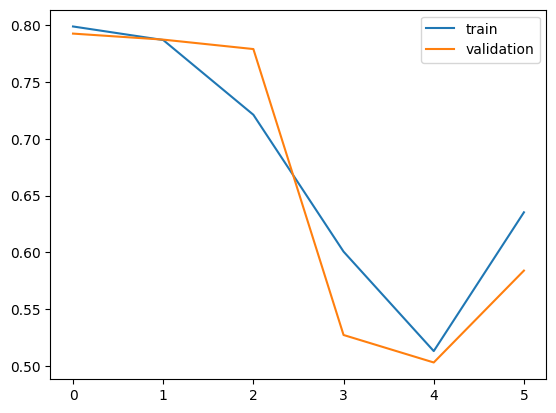

In [198]:
l2reg_sqrt_train = [all_model_accuracy_train[2][i][1] for i in range(len(c))]
l2reg_sqrt_val = [all_model_accuracy_val[2][i][1] for i in range(len(c))]
plt.plot(l2reg_sqrt_train, label = 'train')
plt.plot(l2reg_sqrt_val, label = 'validation')
plt.legend()
plt.show()

In [199]:
# Model [349,64,32,16,1] no regularization
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
for i in range(len(data_train)):
    input_shape = [data_train[i].shape[1]]
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, activation='sigmoid', input_shape=input_shape),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=16, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.MeanSquaredError())
    losses = model.fit(data_train[i].to_numpy().astype(int), Y_train,
                       validation_data=(data_val[i].to_numpy().astype(int), Y_validation),
                       batch_size=64,
                       epochs=32, verbose=0)
    argmax_train_accuracy = np.argmax(losses.history['accuracy'])
    max_train_accuracy = losses.history['accuracy'][argmax_train_accuracy]
    argmax_val_accuracy = np.argmax(losses.history['val_accuracy'])
    max_val_accuracy = losses.history['val_accuracy'][argmax_val_accuracy]
    print(f"[{i}] Best Training Accuracy at Epoch {argmax_train_accuracy}: {max_train_accuracy}")
    print(f"[{i}] Best Validation Accuracy at Epoch {argmax_val_accuracy}: {max_val_accuracy}")

[0] Best Training Accuracy at Epoch 31: 0.8130204677581787
[0] Best Validation Accuracy at Epoch 29: 0.7987897396087646
[1] Best Training Accuracy at Epoch 22: 0.800719141960144
[1] Best Validation Accuracy at Epoch 17: 0.7889561057090759
[2] Best Training Accuracy at Epoch 25: 0.8156699538230896
[2] Best Validation Accuracy at Epoch 3: 0.7972768545150757


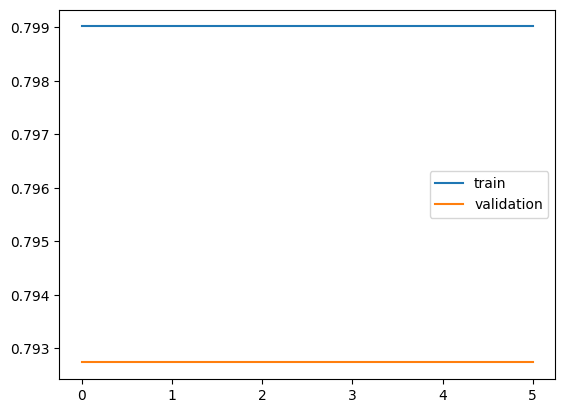

In [200]:
c = [0,1,2,3,4,5]
noreg_x_train = [model_accuracy_train[0][1] for i in range(len(c))]
noreg_x_val = [model_accuracy_val[0][1] for i in range(len(c))]
plt.plot(c, noreg_x_train, label = 'train')
plt.plot(c, noreg_x_val, label = 'validation')
plt.legend()
plt.show()

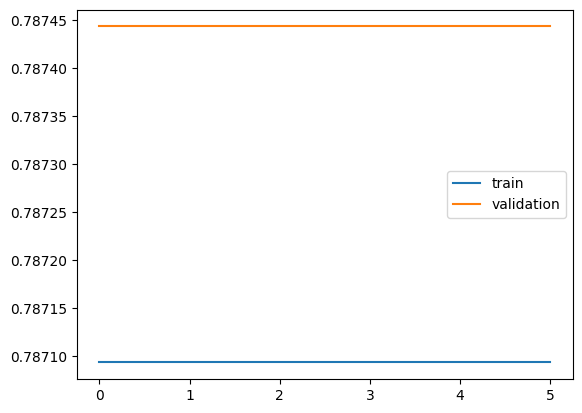

In [201]:
noreg_sq_train = [model_accuracy_train[1][1] for i in range(len(c))]
noreg_sq_val = [model_accuracy_val[1][1] for i in range(len(c))]
plt.plot(c, noreg_sq_train, label = 'train')
plt.plot(c, noreg_sq_val, label = 'validation')
plt.legend()
plt.show()

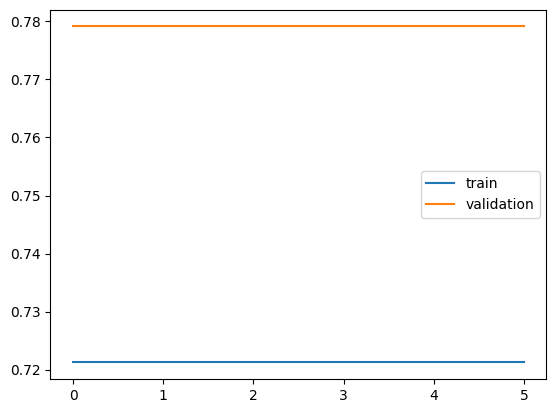

In [202]:
noreg_sqrt_train = [model_accuracy_train[2][1] for i in range(len(c))]
noreg_sqrt_val = [model_accuracy_val[2][1] for i in range(len(c))]
plt.plot(c, noreg_sqrt_train, label = 'train')
plt.plot(c, noreg_sqrt_val, label = 'validation')
plt.legend()
plt.show()

In [203]:
# Model [349,64,32,16,1] l1 regularization
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
all_model_accuracy_train = []
all_model_accuracy_val = []
c = [0.01, 0.1, 1, 10, 100, 1000]
for i in range(len(data_train)):
    model_accuracy_train = []
    model_accuracy_val = []
    for j in range(len(c)):
        print(f"Regularization Parameter: {c[j]}")
        input_shape = [data_train[i].shape[1]]
        tf.keras.Sequential([
            tf.keras.layers.Dense(units=64, activation='sigmoid', input_shape=input_shape, kernel_regularizer=keras.regularizers.l1(c[j])),
            tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=keras.regularizers.l1(c[j])),
            tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=keras.regularizers.l1(c[j])),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.MeanSquaredError())
        losses = model.fit(data_train[i].to_numpy().astype(int), Y_train,
                           validation_data=(data_val[i].to_numpy().astype(int), Y_validation),
                           batch_size=64,
                           epochs=32, verbose=0)
        argmax_train_accuracy = np.argmax(losses.history['accuracy'])
        max_train_accuracy = losses.history['accuracy'][argmax_train_accuracy]
        argmax_val_accuracy = np.argmax(losses.history['val_accuracy'])
        max_val_accuracy = losses.history['val_accuracy'][argmax_val_accuracy]
        model_accuracy_train.append([argmax_train_accuracy,max_train_accuracy])
        model_accuracy_val.append([argmax_val_accuracy,max_val_accuracy])
        print(f"[{i}] Best Training Accuracy at Epoch {argmax_train_accuracy}: {max_train_accuracy}")
        print(f"[{i}] Best Validation Accuracy at Epoch {argmax_val_accuracy}: {max_val_accuracy}")
    all_model_accuracy_train.append(model_accuracy_train)
    all_model_accuracy_val.append(model_accuracy_val)

Regularization Parameter: 0.01
[0] Best Training Accuracy at Epoch 28: 0.8156699538230896
[0] Best Validation Accuracy at Epoch 9: 0.7972768545150757
Regularization Parameter: 0.1
[0] Best Training Accuracy at Epoch 29: 0.8232399821281433
[0] Best Validation Accuracy at Epoch 19: 0.7965204119682312
Regularization Parameter: 1
[0] Best Training Accuracy at Epoch 25: 0.8245646953582764
[0] Best Validation Accuracy at Epoch 20: 0.7957639694213867
Regularization Parameter: 10
[0] Best Training Accuracy at Epoch 31: 0.8255109786987305
[0] Best Validation Accuracy at Epoch 2: 0.7904689908027649
Regularization Parameter: 100
[0] Best Training Accuracy at Epoch 26: 0.8292959928512573
[0] Best Validation Accuracy at Epoch 1: 0.7912254333496094
Regularization Parameter: 1000
[0] Best Training Accuracy at Epoch 3: 0.8328917622566223
[0] Best Validation Accuracy at Epoch 27: 0.7904689908027649
Regularization Parameter: 0.01
[1] Best Training Accuracy at Epoch 13: 0.813966691493988
[1] Best Validat

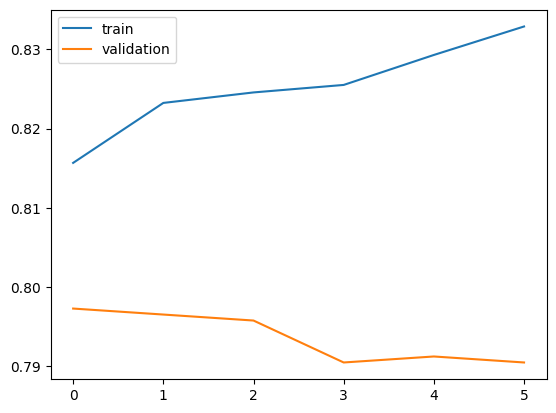

In [204]:
l1reg_x_train = [all_model_accuracy_train[0][i][1] for i in range(len(c))]
l1reg_x_val = [all_model_accuracy_val[0][i][1] for i in range(len(c))]
plt.plot(l1reg_x_train, label = 'train')
plt.plot(l1reg_x_val, label = 'validation')
plt.legend()
plt.show()

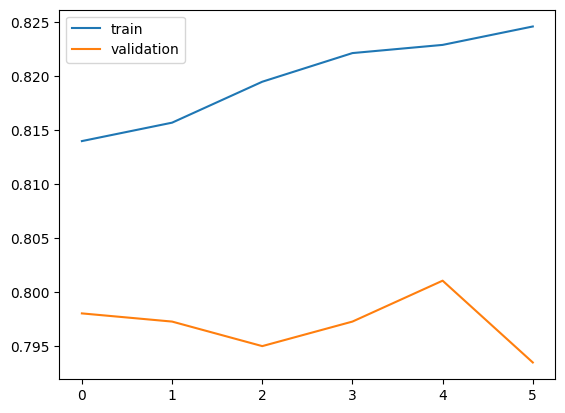

In [205]:
l1reg_sq_train = [all_model_accuracy_train[1][i][1] for i in range(len(c))]
l1reg_sq_val = [all_model_accuracy_val[1][i][1] for i in range(len(c))]
plt.plot(l1reg_sq_train, label = 'train')
plt.plot(l1reg_sq_val, label = 'validation')
plt.legend()
plt.show()

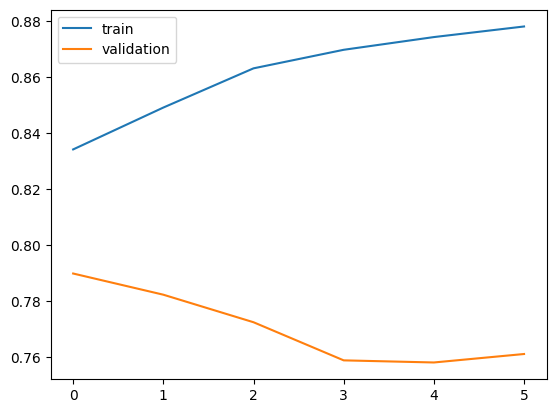

In [206]:
l1reg_sqrt_train = [all_model_accuracy_train[2][i][1] for i in range(len(c))]
l1reg_sqrt_val = [all_model_accuracy_val[2][i][1] for i in range(len(c))]
plt.plot(l1reg_sqrt_train, label = 'train')
plt.plot(l1reg_sqrt_val, label = 'validation')
plt.legend()
plt.show()

In [207]:
# Model [349,64,32,16,1] l2 regularization
data_train = [final_train, square_transformed_train,sqrt_transformed_train]
data_val = [final_validation, square_transformed_val,sqrt_transformed_val]
all_model_accuracy_train = []
all_model_accuracy_val = []
c = [0.01, 0.1, 1, 10, 100, 1000]
for i in range(len(data_train)):
    model_accuracy_train = []
    model_accuracy_val = []
    for j in range(len(c)):
        print(f"Regularization Parameter: {c[j]}")
        input_shape = [data_train[i].shape[1]]
        tf.keras.Sequential([
            tf.keras.layers.Dense(units=64, activation='sigmoid', input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(c[j])),
            tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=keras.regularizers.l2(c[j])),
            tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=keras.regularizers.l2(c[j])),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.MeanSquaredError())
        losses = model.fit(data_train[i].to_numpy().astype(int), Y_train,
                           validation_data=(data_val[i].to_numpy().astype(int), Y_validation),
                           batch_size=64,
                           epochs=32, verbose=0)
        argmax_train_accuracy = np.argmax(losses.history['accuracy'])
        max_train_accuracy = losses.history['accuracy'][argmax_train_accuracy]
        argmax_val_accuracy = np.argmax(losses.history['val_accuracy'])
        max_val_accuracy = losses.history['val_accuracy'][argmax_val_accuracy]
        model_accuracy_train.append([argmax_train_accuracy,max_train_accuracy])
        model_accuracy_val.append([argmax_val_accuracy,max_val_accuracy])
        print(f"[{i}] Best Training Accuracy at Epoch {argmax_train_accuracy}: {max_train_accuracy}")
        print(f"[{i}] Best Validation Accuracy at Epoch {argmax_val_accuracy}: {max_val_accuracy}")
    all_model_accuracy_train.append(model_accuracy_train)
    all_model_accuracy_val.append(model_accuracy_val)
    

Regularization Parameter: 0.01
[0] Best Training Accuracy at Epoch 27: 0.8291067481040955
[0] Best Validation Accuracy at Epoch 3: 0.7866868376731873
Regularization Parameter: 0.1
[0] Best Training Accuracy at Epoch 26: 0.8351627588272095
[0] Best Validation Accuracy at Epoch 14: 0.7844175696372986
Regularization Parameter: 1
[0] Best Training Accuracy at Epoch 30: 0.8417865037918091
[0] Best Validation Accuracy at Epoch 1: 0.7836611270904541
Regularization Parameter: 10
[0] Best Training Accuracy at Epoch 25: 0.8459500670433044
[0] Best Validation Accuracy at Epoch 3: 0.7768532633781433
Regularization Parameter: 100
[0] Best Training Accuracy at Epoch 29: 0.8495457768440247
[0] Best Validation Accuracy at Epoch 25: 0.7776097059249878
Regularization Parameter: 1000
[0] Best Training Accuracy at Epoch 5: 0.8510597944259644
[0] Best Validation Accuracy at Epoch 30: 0.7768532633781433
Regularization Parameter: 0.01
[1] Best Training Accuracy at Epoch 26: 0.8141559362411499
[1] Best Valida

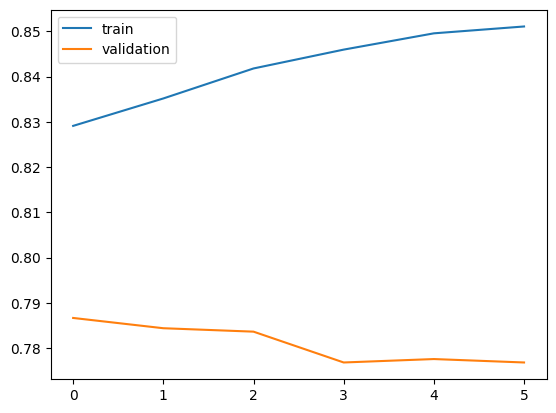

In [208]:
l2reg_x_train = [all_model_accuracy_train[0][i][1] for i in range(len(c))]
l2reg_x_val = [all_model_accuracy_val[0][i][1] for i in range(len(c))]
plt.plot(l2reg_x_train, label = 'train')
plt.plot(l2reg_x_val, label = 'validation')
plt.legend()
plt.show()

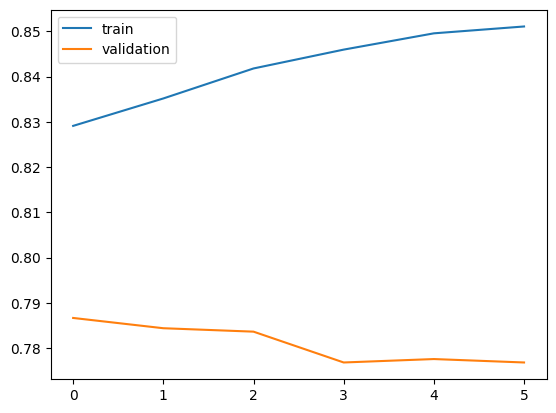

In [209]:
l2reg_sq_train = [all_model_accuracy_train[0][i][1] for i in range(len(c))]
l2reg_sq_val = [all_model_accuracy_val[0][i][1] for i in range(len(c))]
plt.plot(l2reg_sq_train, label = 'train')
plt.plot(l2reg_sq_val, label = 'validation')
plt.legend()
plt.show()

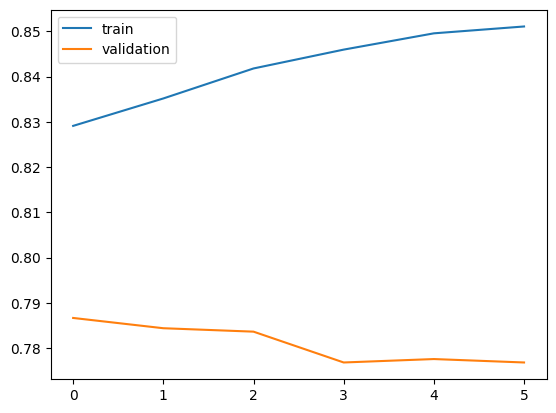

In [210]:
l2reg_sqrt_train = [all_model_accuracy_train[0][i][1] for i in range(len(c))]
l2reg_sqrt_val = [all_model_accuracy_val[0][i][1] for i in range(len(c))]
plt.plot(l2reg_sqrt_train, label = 'train')
plt.plot(l2reg_sqrt_val, label = 'validation')
plt.legend()
plt.show()

In [222]:
input_shape = [data_train[0].shape[1]]
tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='sigmoid', input_shape=input_shape),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.MeanSquaredError())
losses = model.fit(data_train[0].to_numpy().astype(int), Y_train,
                   validation_data=(data_val[0].to_numpy().astype(int), Y_validation),
                   batch_size=64,
                   epochs=32)
argmax_train_accuracy = np.argmax(losses.history['accuracy'])
max_train_accuracy = losses.history['accuracy'][argmax_train_accuracy]
argmax_val_accuracy = np.argmax(losses.history['val_accuracy'])
max_val_accuracy = losses.history['val_accuracy'][argmax_val_accuracy]
print(f"Best Training Accuracy at Epoch {argmax_train_accuracy}: {max_train_accuracy}")
print(f"Best Validation Accuracy at Epoch {argmax_val_accuracy}: {max_val_accuracy}")

Epoch 1/32
83/83 [==============================] - 1s 9ms/step - loss: 0.1288 - accuracy: 0.8276 - val_loss: 0.1688 - val_accuracy: 0.7829
Epoch 2/32
83/83 [==============================] - 1s 6ms/step - loss: 0.1268 - accuracy: 0.8312 - val_loss: 0.1669 - val_accuracy: 0.7814
Epoch 3/32
83/83 [==============================] - 1s 6ms/step - loss: 0.1261 - accuracy: 0.8321 - val_loss: 0.1693 - val_accuracy: 0.7829
Epoch 4/32
83/83 [==============================] - 1s 6ms/step - loss: 0.1255 - accuracy: 0.8321 - val_loss: 0.1716 - val_accuracy: 0.7829
Epoch 5/32
83/83 [==============================] - 1s 6ms/step - loss: 0.1270 - accuracy: 0.8283 - val_loss: 0.1683 - val_accuracy: 0.7784
Epoch 6/32
83/83 [==============================] - 1s 6ms/step - loss: 0.1263 - accuracy: 0.8329 - val_loss: 0.1688 - val_accuracy: 0.7814
Epoch 7/32
83/83 [==============================] - 1s 6ms/step - loss: 0.1267 - accuracy: 0.8295 - val_loss: 0.1703 - val_accuracy: 0.7731
Epoch 8/32
83/83 [==

In [224]:
val_predictions = np.rint(model.predict(data_val[0].to_numpy().astype(int)))

42/42 [==============================] - 0s 2ms/step


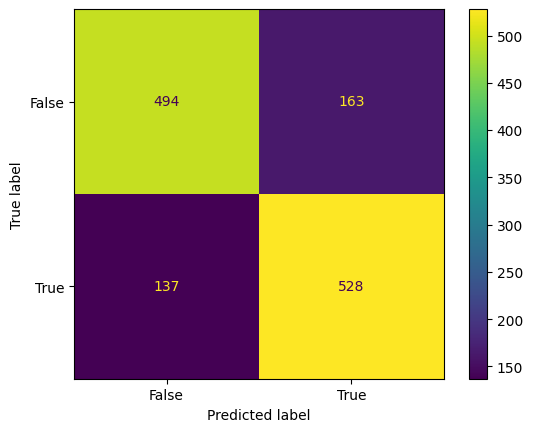

In [225]:
cf = confusion_matrix(Y_validation, val_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

In [228]:
accuracy=(494+528)/(494+528+147+187)
precision=(528)/(528+163)
recall=(528)/(528+137)

In [229]:
print(accuracy, precision, recall)

0.7536873156342183 0.76410998552822 0.793984962406015
